## Time-Series Analysis

#### 1. Importing Libraries and Data
#### 2. Subsetting, Wrangling, and Cleaning data
#### 3. Time-Series Analysis: Decomposition
#### 4. Testing for Stationarity
#### 5. Stationarizing

### Importing Libraries and Data

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings('ignore') # Disable warnings

plt.style.use('fivethirtyeight') # Style for plots

In [8]:
# define path
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'

In [9]:
# import data
df = pd.read_pickle(os.path.join(path, 'e_commerce_final.pkl'))
delays = pd.read_csv(os.path.join(path, 'shipping_delays.csv'))

In [10]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,customer_city,customer_state,product_category_name_english,lead_type,lead_behaviour_profile,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,campos dos goytacazes,RJ,cool_stuff,nan,nan,campos dos goytacazes,RJ,8 days 01:58:13,8.0,Average Shipping
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,santa fe do sul,SP,pet_shop,nan,nan,santa fe do sul,SP,16 days 16:59:11,16.0,Slow Shipping
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,para de minas,MG,furniture_decor,nan,nan,pará de minas,MG,8 days 10:30:46,8.0,Average Shipping
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,atibaia,SP,perfumery,nan,nan,atibaia,SP,6 days 15:22:21,6.0,Quick Shipping
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,varzea paulista,SP,garden_tools,nan,nan,varzea paulista,SP,25 days 14:32:18,25.0,Slow Shipping


In [11]:
delays.head()

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,product_category_name_english,lead_type,lead_behaviour_profile,geolocation_city,geolocation_state,shipping_time,shipping_days,shipping_speed,shipping_delay_num,shipping_delay_days
0,10,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,1.0,credit_card,...,health_beauty,NaN,NaN,santos,SP,9 days 11:42:10,9.0,Average Shipping,1 days 06:17:31,1
1,13,00063b381e2406b52ad429470734ebd5,1,f177554ea93259a5b282f24e33f65ab6,8602a61d680a10a82cceeeda0d99ea3d,2018-07-31 17:30:39,45.00,12.98,1.0,credit_card,...,fashion_bags_accessories,NaN,NaN,monte alto,SP,11 days 07:56:46,11.0,Average Shipping,1 days 01:56:52,1
2,28,000e906b789b55f64edcb1f84030f90d,1,57d79905de06d8897872c551bfd09358,ea8482cd71df3c1969d7b9473ff13abc,2017-11-27 19:09:02,21.99,11.85,1.0,credit_card,...,telephony,NaN,NaN,santa cruz do rio pardo,SP,18 days 10:18:21,18.0,Slow Shipping,3 days 05:27:23,3
3,55,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.10,44.29,1.0,credit_card,...,computers_accessories,NaN,NaN,campo alegre,AL,46 days 22:06:48,46.0,Slow Shipping,4 days 20:32:07,4
4,65,001c85b5f68d2be0cb0797afc9e8ce9a,1,84f456958365164420cfc80fbe4c7fab,4a3ca9315b744ce9f8e9374361493884,2017-11-29 22:38:47,99.00,13.71,1.0,credit_card,...,bed_bath_table,NaN,NaN,sao paulo,SP,28 days 07:58:53,28.0,Slow Shipping,9 days 06:37:40,9


In [12]:
df.dtypes

order_id                                  object
order_item_id                              int64
product_id                                object
seller_id                                 object
shipping_limit_date                       object
price                                    float64
freight_value                            float64
payment_sequential                       float64
payment_type                              object
payment_installments                     float64
payment_value                            float64
review_id                                 object
review_score                             float64
review_comment_title                      object
review_comment_message                    object
review_creation_date              datetime64[ns]
review_answer_timestamp           datetime64[ns]
customer_id                               object
order_status                              object
order_purchase_timestamp                  object
order_approved_at   

In [13]:
df.shape

(110027, 47)

In [14]:
# product category name subsets
pop_categories = df.groupby('product_category_name_english').agg({'payment_value':'sum'}).sort_values(by = 'payment_value', ascending = False)

In [15]:
top_10_cat_payment = pop_categories.head(10) # top 10 in sales

In [16]:
pop_categories_orders = df.groupby('product_category_name_english').agg({'order_id':'count'}).sort_values(by = 'order_id', ascending = False)

In [17]:
top_10_cat_orders = pop_categories_orders.head(10)

In [18]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [19]:
sub = df[['order_purchase_timestamp','payment_value']]

In [20]:
sub.head()

,order_purchase_timestamp,payment_value
0,2017-09-13 08:59:02,72.19
1,2017-04-26 10:53:06,259.83
3,2018-01-14 14:33:31,216.87
5,2018-08-08 10:00:35,25.78
6,2017-02-04 13:57:51,218.04


In [21]:
df[['order_purchase_timestamp']].head().sort_values(by = 'order_purchase_timestamp')

,order_purchase_timestamp
6,2017-02-04 13:57:51
1,2017-04-26 10:53:06
0,2017-09-13 08:59:02
3,2018-01-14 14:33:31
5,2018-08-08 10:00:35


In [22]:
sub.isnull().sum()

order_purchase_timestamp    0
payment_value               3
dtype: int64

In [23]:
sub = sub.dropna()

In [24]:
sales = sub.groupby(pd.Grouper(key = 'order_purchase_timestamp', freq = 'M')).agg({'payment_value':'sum'})

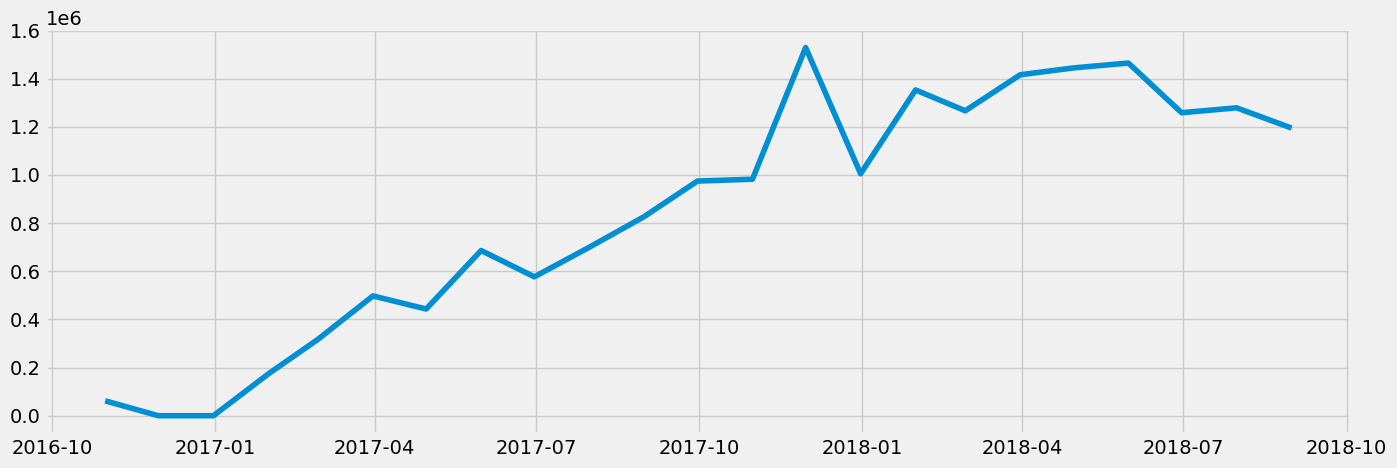

In [25]:
plt.figure(figsize=(15,5), dpi=100)

plt.plot(sales)

In [26]:
sales = sales.dropna()
sales

,payment_value
order_purchase_timestamp,
2016-10-31,61860.77
2016-11-30,0.00
2016-12-31,19.62
2017-01-31,173672.44
2017-02-28,317446.95
2017-03-31,497573.94
2017-04-30,443254.67
2017-05-31,686261.34
2017-06-30,576998.12


In [27]:
sales = sales[sales['payment_value'] > 0]
sales

,payment_value
order_purchase_timestamp,
2016-10-31,61860.77
2016-12-31,19.62
2017-01-31,173672.44
2017-02-28,317446.95
2017-03-31,497573.94
2017-04-30,443254.67
2017-05-31,686261.34
2017-06-30,576998.12
2017-07-31,699819.15


In [28]:
sales2 = sales.reset_index()
sales2

,order_purchase_timestamp,payment_value
0,2016-10-31,61860.77
1,2016-12-31,19.62
2,2017-01-31,173672.44
3,2017-02-28,317446.95
4,2017-03-31,497573.94
5,2017-04-30,443254.67
6,2017-05-31,686261.34
7,2017-06-30,576998.12
8,2017-07-31,699819.15
9,2017-08-31,827331.67


In [29]:
# Add new entry to sales so we get 2 complete cycles
new_entry = {'order_purchase_timestamp':'2016-09-30','payment_value': 61860}
new_entry2 = {'order_purchase_timestamp':'2016-08-30', 'payment_value': 61860}

In [30]:
sales2 = sales2._append(new_entry, ignore_index = True)
sales2 = sales2._append(new_entry2, ignore_index = True)

In [31]:
sales2['order_purchase_timestamp'] = pd.to_datetime(sales2['order_purchase_timestamp'])

In [32]:
sales2 = sales2.sort_values(by = 'order_purchase_timestamp')
sales2

,order_purchase_timestamp,payment_value
23,2016-08-30,61860.00
22,2016-09-30,61860.00
0,2016-10-31,61860.77
1,2016-12-31,19.62
2,2017-01-31,173672.44
3,2017-02-28,317446.95
4,2017-03-31,497573.94
5,2017-04-30,443254.67
6,2017-05-31,686261.34
7,2017-06-30,576998.12


In [33]:
# Set the date column as index
from datetime import datetime

sales2['datetime'] = pd.to_datetime(sales2['order_purchase_timestamp'])
sales2 = sales2.set_index('datetime')
sales2.drop(['order_purchase_timestamp'], axis = 1, inplace = True)


In [34]:
sales2.columns

Index(['payment_value'], dtype='object')

In [35]:
# Create an hour columnn to plot the busiest hours of the day
df['order_hour'] = df['order_purchase_timestamp'].dt.hour
df['order_hour']

0          8
1         10
3         14
5         10
6         13
          ..
177468    13
177470    10
177471    17
177473    23
177474    17
Name: order_hour, Length: 110027, dtype: int32

In [36]:
# group by order_hour
order_hour_group = df.groupby('order_hour').agg({'payment_value':'sum'}).sort_values(by = 'order_hour', ascending = True)
order_hour_group

,payment_value
order_hour,
0,450244.16
1,199830.84
2,89971.50
3,45424.20
4,35157.89
5,29477.61
6,76172.34
7,207230.72
8,581083.58


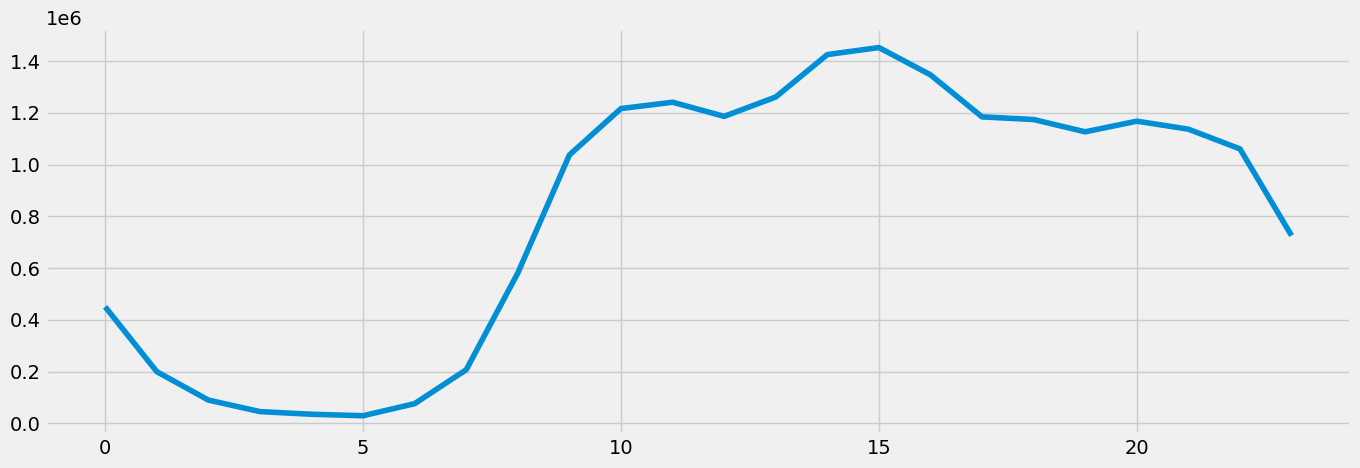

In [37]:
# Plot order hour
plt.figure(figsize=(15,5), dpi=100)

plt.plot(order_hour_group)

### Time-Series Analysis: Decomposition

In [38]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(sales2, model = 'additive', period = int(len(sales2)/2))

In [39]:
from pylab import rcParams

rcParams['figure.figsize'] = 15,7

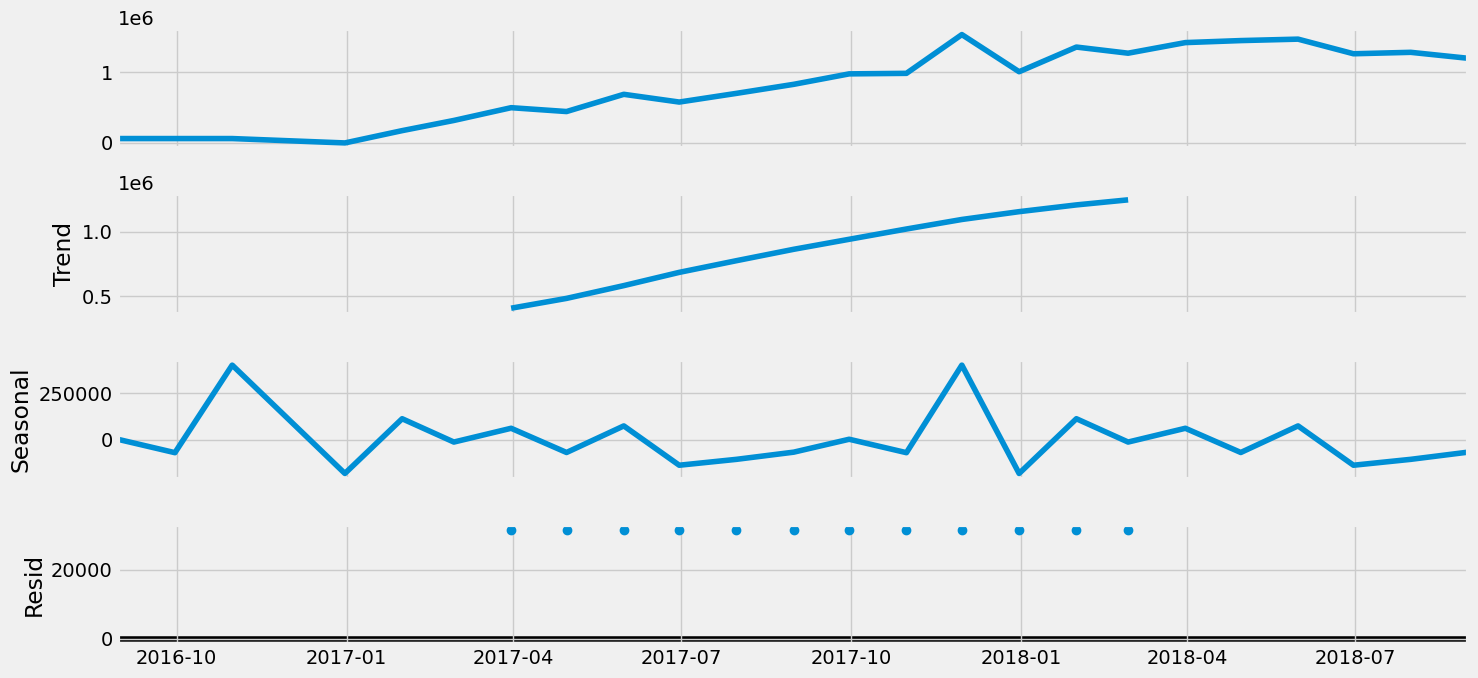

In [40]:
# Plot the separate components
decomposition.plot()
plt.show()

There is a positive trend showing between April 2017 and April 2018. There does appear to be seasonality occuring during November and December each year which would indicate higher spending around the holidays. 

### Testing for Stationarity

In [41]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dicky-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lages Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)'%key] = value
    print (result)
    
dickey_fuller(sales2['payment_value'])

Dicky-Fuller Stationarity test:
Test Statistic                 -1.410760
p-value                         0.577107
Number of Lages Used            1.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


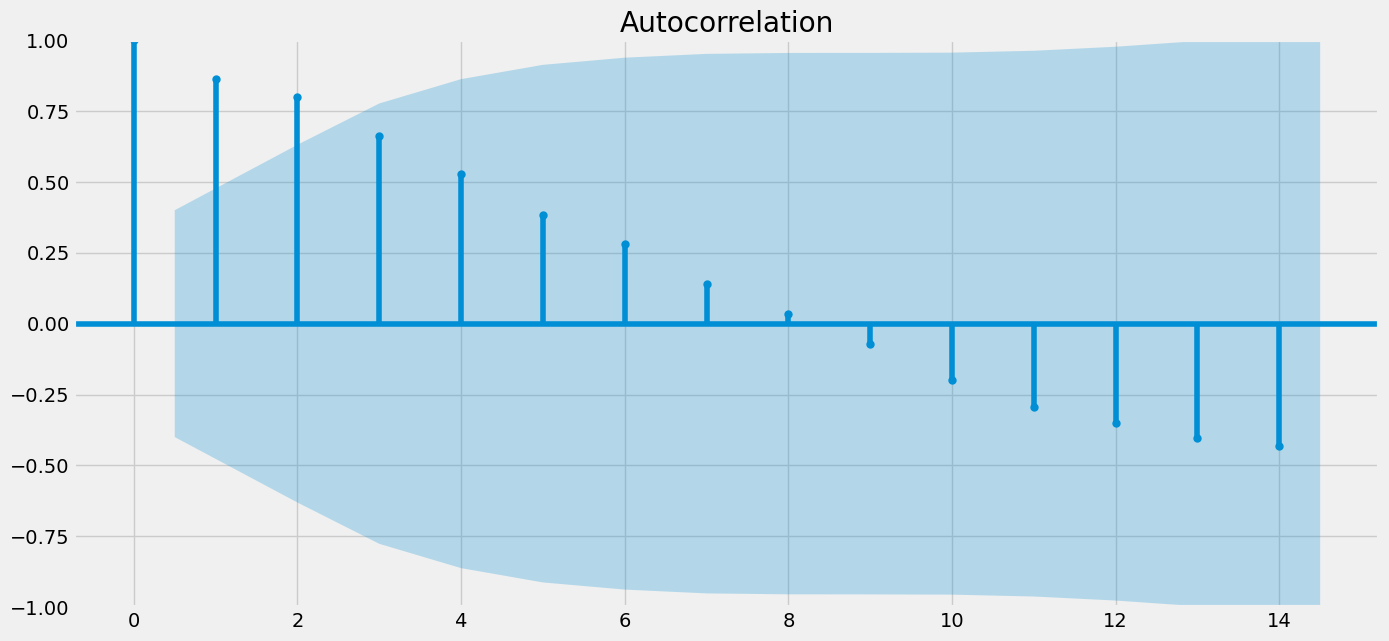

In [42]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(sales2)
plt.show()

#### Null Hypothesis
The spending patterns have stayed the same over time. 

Our p-value is much more than 0.05 which indicates our result is not significant. 
The Test Statistic is more than the 5% critical value. Since this is the case, we cannot reject the null hypothesis.

### Stationarizing the Federal Reserve Economic Data

In [43]:
sales_diff = sales2 - sales2.shift(1)

In [44]:
sales_diff.dropna(inplace = True)

In [45]:
sales_diff.head()

,payment_value
datetime,
2016-09-30,0.00
2016-10-31,0.77
2016-12-31,-61841.15
2017-01-31,173652.82
2017-02-28,143774.51


In [46]:
sales_diff.columns

Index(['payment_value'], dtype='object')

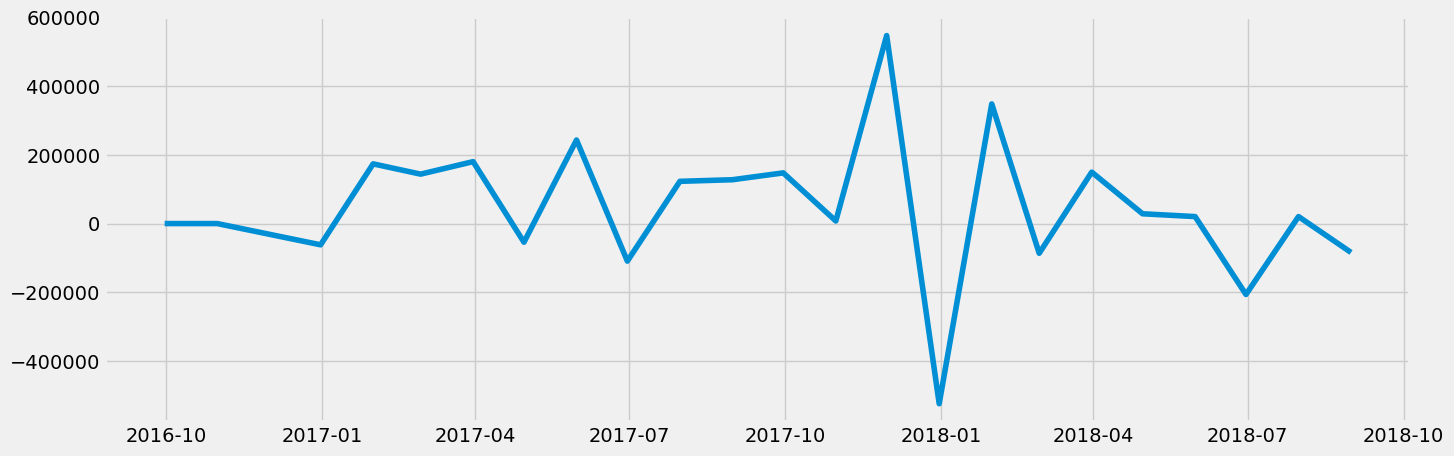

In [47]:
plt.figure(figsize =(15,5), dpi=100)
plt.plot(sales_diff)

In [48]:
dickey_fuller(sales_diff)

Dicky-Fuller Stationarity test:
Test Statistic                -9.031633e+00
p-value                        5.425180e-15
Number of Lages Used           0.000000e+00
Number of Observations Used    2.200000e+01
Critical Value (1%)           -3.769733e+00
Critical Value (5%)           -3.005426e+00
Critical Value (10%)          -2.642501e+00
dtype: float64


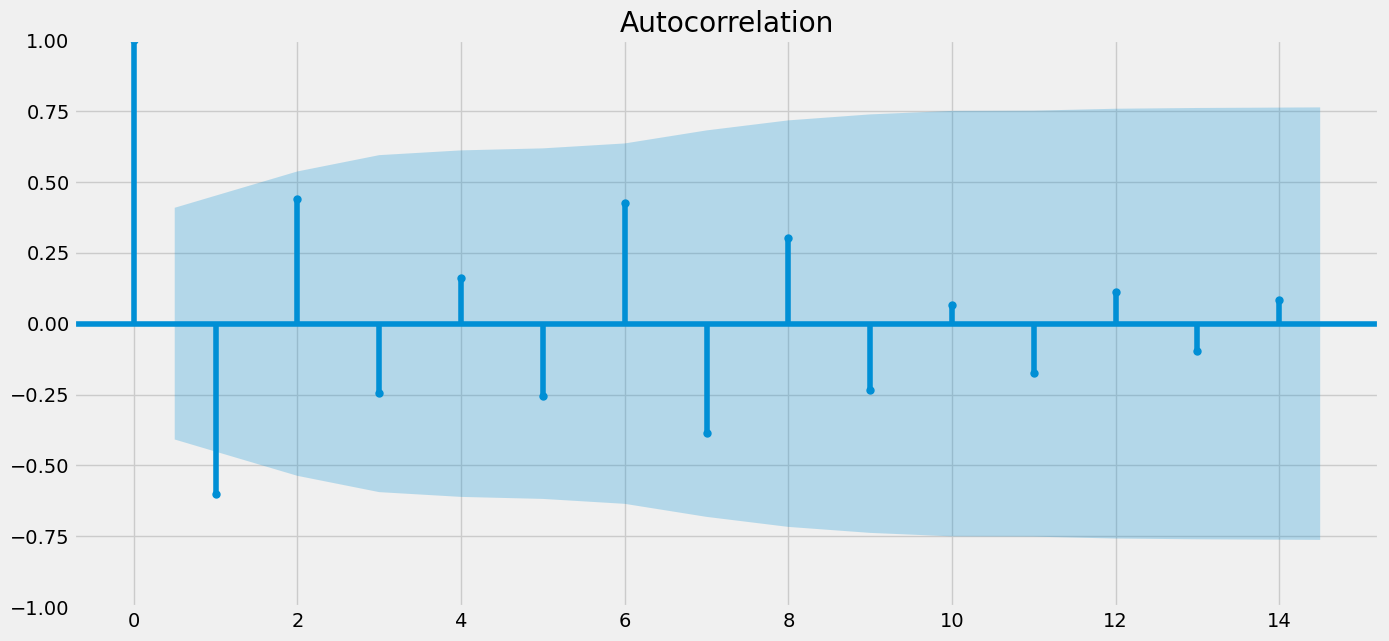

In [49]:
plot_acf(sales_diff)
plt.show()

In [50]:
# Another round of differencing
sales_diff2 = sales_diff - sales_diff.shift(1)

In [51]:
sales_diff2.dropna(inplace = True)

In [52]:
sales_diff2.head()

,payment_value
datetime,
2016-10-31,0.77
2016-12-31,-61841.92
2017-01-31,235493.97
2017-02-28,-29878.31
2017-03-31,36352.48


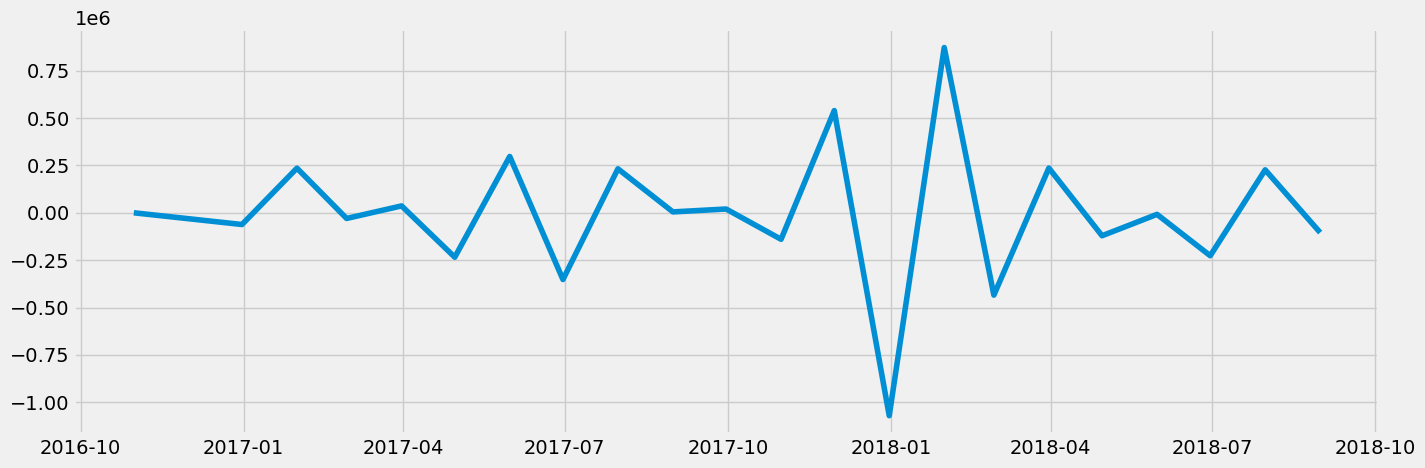

In [53]:
plt.figure(figsize =(15,5), dpi=100)
plt.plot(sales_diff2)

In [54]:
dickey_fuller(sales_diff2)

Dicky-Fuller Stationarity test:
Test Statistic                  0.229775
p-value                         0.973883
Number of Lages Used            9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


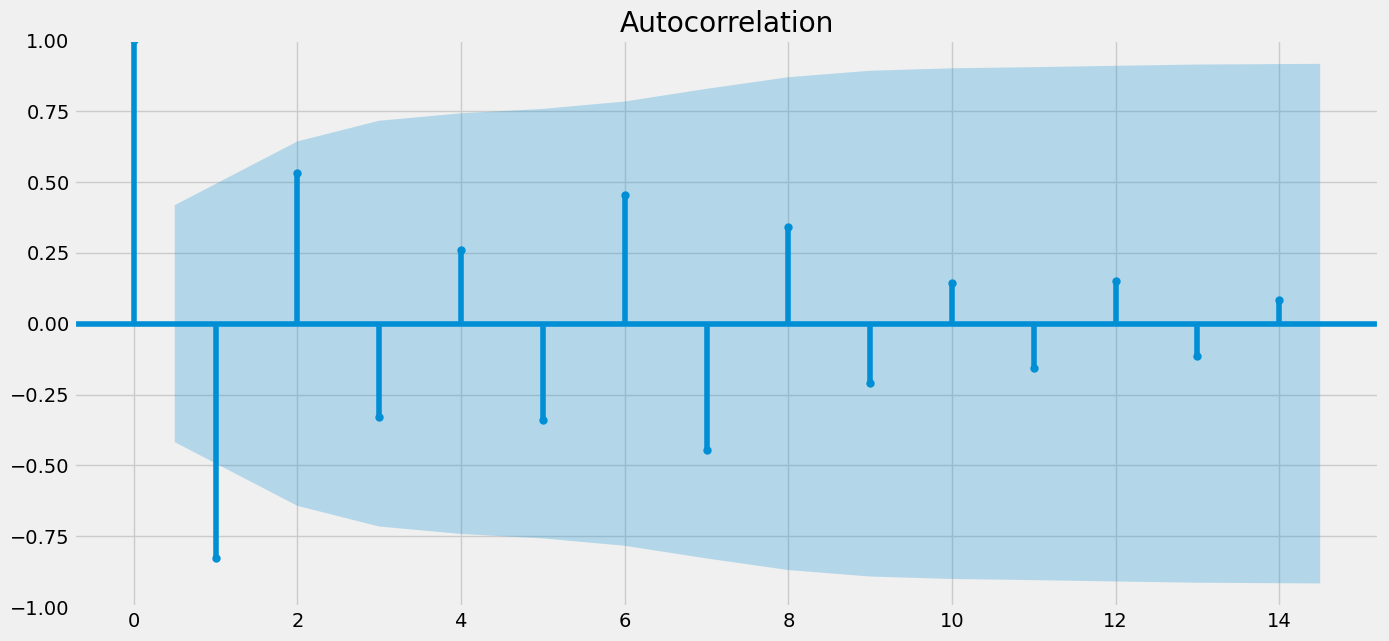

In [55]:
plot_acf(sales_diff2)
plt.show()

After the differencing and a second round of of the dickey_fuller test with the new data, it is still proven to be insignificant. I could look to compare the time with a different variable to test. 

In [56]:
# Export data
df.to_csv(os.path.join(path, 'e_commerce_final.csv'))